In [3]:
import gpjax as gpx
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from jaxtyping import Float, Array
from jax.config import config

config.update("jax_enable_x64", True)
key = jr.PRNGKey(123)

2022-11-14 21:10:26.195308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


## Stationary Kernel Samples

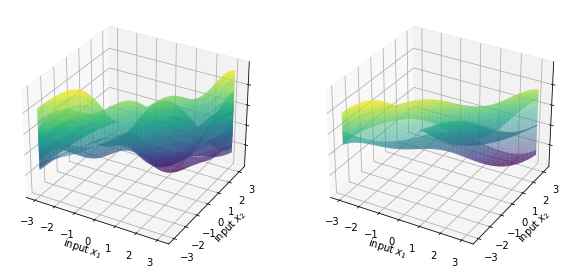

In [10]:
def plot_kernel(kernel_params: dict, index_points: Float[Array, "N 2"], ax):
    N = int(jnp.sqrt(index_points.shape[0]))
    prior = gpx.Prior(kernel=gpx.kernels.RBF(active_dims=[0, 1]))
    params, *_ = gpx.initialise(prior, key).unpack()
    params['kernel'] = kernel_params
    sample = prior.predict(params)(index_points).sample(seed = key, sample_shape=(1, ))
    return sample.reshape(N, N)


# Generate an 2D N x N grid of index points where each row is a pair of coordinates
index_points = jnp.linspace(-3, 3.1, num=50)
X = jnp.stack(jnp.meshgrid(index_points, index_points), axis=-1).reshape(-1, 2)
params = [{"lengthscale": jax.Array([[1., 0.5]]), "variance": jax.Array([1.0])}, 
          {"lengthscale": jax.Array([[1.5, 1.]]), "variance": jax.Array([1.0])}]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={"projection": "3d"})

for ax, pa in zip(axes.ravel(), params):
    y = plot_kernel(pa, X, ax)
    ax.plot_surface(index_points, index_points, y, cmap="viridis", lw=0.5, rstride=1, cstride=1, edgecolor=None, alpha=0.5)
    ax.set_xlabel("input $x_1$", labelpad=-1)
    # ax.view_init(None, 180 + 50)
    ax.set_zlim(-2.0, 3.0)
    ax.set_zticks(range(-1, 3))
    ax.set_zticklabels([])
    ax.set_ylabel("input $x_2$", labelpad=-1)

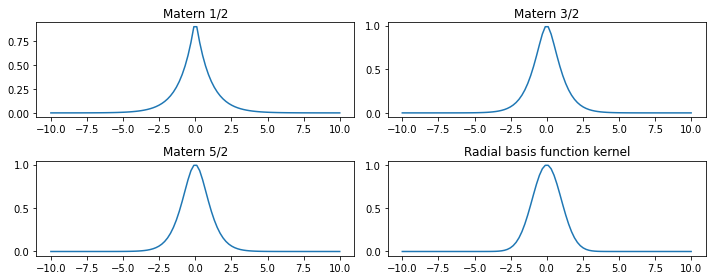

In [18]:
kernels = [gpx.Matern12(), gpx.Matern32(), gpx.Matern52(), gpx.RBF()]

fig, axes = plt.subplots(2, 2, figsize=(10, 4), tight_layout=True)

X = jnp.linspace(-10, 10, 100).reshape(-1, 1)
zero_vec = jax.Array([[0]])

for a, k in zip(axes.ravel(), kernels):
    params, *_ = gpx.initialise(k, key).unpack()
    kx0 = k.cross_covariance(k, params, X, zero_vec)
    a.plot(X, kx0)
    a.set_title(k.name)

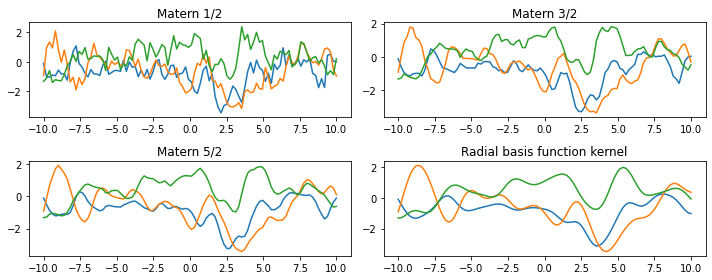

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 4), tight_layout=True)

X = jnp.linspace(-10, 10, 100).reshape(-1, 1)
zero_vec = jax.Array([[0]])

for a, k in zip(axes.ravel(), kernels):
    prior = gpx.Prior(kernel=k)
    params, *_ = gpx.initialise(prior, key).unpack()
    prior_sample = prior.predict(params)(X).sample(seed=key, sample_shape=(3, )).T
    a.plot(X, prior_sample)
    a.set_title(k.name)

In [ ]:
combinations = [gpx.kernels.]